# Introduction to QuTiP



## Importing



[Source](https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/lectures/Lecture-0-Introduction-to-QuTiP.ipynb)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# QuTiP imports

from qutip import (Qobj, about, basis, coherent_dm, create, destroy, displace,coherent, expect,
                   fock, fock_dm,mesolve,qeye, sigmax, sigmay, sigmaz, tensor, thermal_dm)

## What is QuTiP?



It is a Python Package for calculations and numerical simulations of quantum systems. It includes facilities for representing and doing calculations with quantum objects such as state vectors, quantum operators of single and composite systems, and superoperators.

It also includes solvers for a time-evolution of quantum systems, according to: 
1. Schrodinger Equation
2. von Neuman Equation
3. Master Equations
4. Floquet formalism
5. Monte Carlo quantum trajectories
6. experimental implementations of stochastic master equations.

### Installation

```python
pip install qutip
```

## Quantum Object Class: `qobj`

Most basic building blovk of QuTiP package is the `Qobj` class, which is used for representing quantum objects such as states and operators. The `Qobj` class contains all the information required to describe a quantum system, such as its matrix representation, composite strcutures and dimensionality

### Creating and Inspecting Quantum Objects

We can create a new quantum object using the `Qobj` class constructor, like this

In [3]:
q = Qobj([[1], [0]])
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

We passed a python list as an argument to the class constructor. The data in the list is used to construct the matrix representation of the quantum objects, and the other properties of the quantum object is by default computed from the same data. 

We can inspect the properties of a `Qobj` instance using the following

In [4]:
q.dims # the dimensions of the quantum object

[[2], [1]]

In [5]:
q.shape # the shape of the quantum object

(2, 1)

In [6]:
q.data # the data of the quantum object

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [7]:
q.full() # the full dense matrix representation of the quantum object

array([[1.+0.j],
       [0.+0.j]])

In [9]:
q.isherm # check if the quantum object is Hermitian


False

In [10]:
q.type # check the type of the quantum object

'ket'

### Using `Qobj` insances for calculations

Wih `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [11]:
sy = Qobj([[0, -1j], [1j,0]]) # the sigma-y Pauli operator
sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [12]:
sz = Qobj([[1, 0], [0, -1]]) # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [15]:
# let's do some arithectic with quantum objects

H = 1.0 * sz + 0.1 *sy
print("Qubit Hamiltonian = \n")
H

Qubit Hamiltonian = 



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

Modifying quantum objects using the `Qobj` methods

In [16]:
sy.dag() # the Hermitian conjugate of the sigma-y operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [17]:
H.tr() # the trace of the Hamiltonian

0.0

In [19]:
H.eigenenergies() # the eigenenergies of the Hamiltonian

array([-1.00498756,  1.00498756])

To get a complete list of methods and properites, either visit the [official site](https://qutip.org/docs/latest/index.html) or do this:

In [20]:
help(Qobj)

Help on class Qobj in module qutip.qobj:

class Qobj(builtins.object)
 |  Qobj(inpt=None, dims=None, shape=None, type=None, isherm=None, copy=True, fast=False, superrep=None, isunitary=None)
 |  
 |  A class for representing quantum objects, such as quantum operators
 |  and states.
 |  
 |  The Qobj class is the QuTiP representation of quantum operators and state
 |  vectors. This class also implements math operations +,-,* between Qobj
 |  instances (and / by a C-number), as well as a collection of common
 |  operator/state operations.  The Qobj constructor optionally takes a
 |  dimension ``list`` and/or shape ``list`` as arguments.
 |  
 |  Parameters
 |  ----------
 |  inpt : array_like
 |      Data for vector/matrix representation of the quantum object.
 |  dims : list
 |      Dimensions of object used for tensor products.
 |  shape : list
 |      Shape of underlying data structure (matrix shape).
 |  copy : bool
 |      Flag specifying whether Qobj should get a copy of the
 |   

In [21]:
dir(Qobj)

['__abs__',
 '__add__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_repr_latex_',
 'check_herm',
 'check_isunitary',
 'conj',
 'copy',
 'cosm',
 'dag',
 'data',
 'diag',
 'dnorm',
 'dual_chan',
 'eigenenergies',
 'eigenstates',
 'eliminate_states',
 'evaluate',
 'expm',
 'extract_states',
 'full',
 'get_data',
 'groundstate',
 'inv',
 'isbra',
 'iscp',
 'iscptp',
 'isherm',
 'ishp',
 'isket',
 'isoper',
 'isoperbra',
 'isoperket',
 

## States and Operators

Normally we do not need to create `Qobj` instances from scracth, using its constructor and passing its matrix representation as argument. Instead we can use function in QuTiP that generate common states and operators for us. here are some examples of built-in state

### State Vectors

A Fock state or number state is a quantum state that is an element of a Fock space.

In [23]:
# fock state of oscillator modes

N = 2 # number of states in the Hilbert space
n = 1 # number of states that will be occupied

basis(N, n) # the fock state (N,n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [25]:
fock(4, 2) # the fock state (N,n)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [26]:
# a coherent state
coherent(N=10, alpha=1.0) # the coherent state with alpha = 1.0

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

### Density Matrices

In [28]:
# a fock state as a density matrix
fock_dm(10,2) # the density matrix of the fock state (N,n)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [29]:
# coherent state as a density matrix
coherent_dm(N=10, alpha=1.0) # the density matrix of the coherent state with alpha = 1.0

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [2.60130047e-01 2.60130047e-01 1.83939720e-01 1.06197648e-01
  5.30988128e-02 2.37465906e-02 9.69402930e-03 3.66645610e-03
  1.28524053e-03 4.71801286e-04]
 [1.50186155e-01 1.50186155e-01 1.06197648e-01 6.13132417e-02
  3.06566143e-02 1.37101007e-02 5.59685050e-03 2.11682944e-03
  7.42033975e-04 2.72394603e-04]
 [7.50930613e-02 7.50930613e-02 5.30988128e-02 3.06566143e-02
  1.53283038e-02 6.85504886e-03 2.79842465e-03 1.05841449e-03
  3.71016908e-04 1.36197272e-04]
 [3.35827506e-02 3.35827506e-02 2.37465906e-02 1.37101007e-02
  6.85504886e-03 3.06568133e-03 1.25149775e-03 4.73338939e-

In [30]:
# thermal state
n = 1 # average number of thermal photons
thermal_dm(10, n) # the density matrix of the thermal state

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0.50048876 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.25024438 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.12512219 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.06256109 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.03128055 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.01564027
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00782014 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00391007 0.         0.        ]
 [0.         0.         0.         0.     

### Operators

Qubit Operators

In [31]:
# pauli operators x
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [32]:
# pauli operators y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [33]:
# pauli operators z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

### Harmoinc Oscillator Operators

In [34]:
# annihilation operator
destroy(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.    

In [35]:
# creation operator
create(10)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.        ]
 [0.         0.         0.         0.    

In [36]:
# the psoition operator

a = destroy(10)

x = a + a.dag()

x

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         2.82842712 0.        ]
 [0.         0.         0.        

**Using `Qobj` we can check some well known commutation relations:**

In [37]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

In [38]:
a = destroy(10)

commutator(a, a.dag())

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -9.]]

The result is not Identity, because we have truncated the Hilbert space. but that's OK, as long as the highest Fock state isn't involved in the dynamics in our Hilber space.  

$$ [x,p] = i$$

In [39]:
x = (a+ a.dag())/np.sqrt(2)

p = -1j * (a - a.dag())/np.sqrt(2)

In [40]:
commutator(x, p)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-9.j]]

Same issue with the truncated Hilbert space, but it's okay

Let's test some **Pauli Spin** inequalities

$$ [\sigma_x, \sigma_y] = 2\iota \sigma_z $$

In [41]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

In [42]:
-1j * commutator(sigmay(), sigmaz()) - sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [44]:
sigmaz() ** 2 == sigmay() ** 2 == sigmax() ** 2 == qeye(2)

True

### Composite System

In most cases we are interested in coupled quantum systems, like coupled qubits, a qubit coupled to a cavity etc.

To define states and operators for such systems in QuTiP, we use the `tensor` function to create `Qobj` instances for the composite system. 

For example, consider the system composed of two qubits. If we want to create a Pauli $\sigma_z$ operator that acts on the first qubit and leaves the second qubit unaffected $\sigma_z \otimes 1$, we would do

In [47]:
sz1 = tensor(sigmaz(), qeye(2))

sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

We can easily verify that this two-qubit operator does indeed have the desired properties:

In [48]:
psi1 = tensor(basis(N,1),basis(N,0)) # excited state in the first qubit
psi2 = tensor(basis(N,0),basis(N,1)) # excited state in the second qubit

In [49]:
"""
This should be false, because sz1 should flip the sign of the excited state of psi1
"""

sz1 * psi1 == psi1

False

In [50]:
""" 
This should be true, because sz1 should not flip the sign of the excited state of psi2
"""

sz1 * psi2 == psi2

True

We made use of the `qeye(N)` function, which generates the identity operator with $N$ quantum states. If we want to do the same thing for the second qubit we can do:

In [51]:
sz2 = tensor(qeye(2), sigmaz())
sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Note the order of the argument to the `tensor` function, and the correspondinly different matrix representation of the two operators `sz1` and `sz2`.

Using the same method, we can create coupling terms of the form $\sigma_x \otimes \sigma_x$

In [52]:
tensor(sigmax(), sigmax())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Now we will create a `Qobj` representation of a coupled two-qubit Hamiltonian

$$ H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)} $$

In [53]:
epsilon = [1.0,1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

To create composite systems of different types, all we need is to change the operators that we pass to the `tensor` function 

For example, the **Jaynes-Cumming** Hamiltonian for a qubit-cavity system

$$ H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-) $$

In [54]:
wc = 1.0 # cavity frequency
wa = 1.0 # atom frequency
g = 0.1 # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# atomic operators
sm = tensor(qeye(5), destroy(2)) # lowering operator
sz = tensor(qeye(5), sigmaz()) # sigma-z operator

# the Jaynes-Cummings Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

Note that 

$$ a \sigma_+ = ( a \otimes 1)(1 \otimes \sigma_+)$$

so the following two are identical

In [55]:
a = tensor(destroy(3), qeye(2))
sp = tensor(qeye(3), create(2))

a*sp

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

In [56]:
tensor(destroy(3), create(2))

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

### Unitary Dynamics


Unitary Evolution of a quantum system in QuTiP can be calculated with the `mesolve` function.

`mesolve` is short for **Master-equation Solve** for dissipative dynamics, but if no collapse operators are given to the solve, it falls back on the unitary evolution of the Schrodinger or the von-Neumann equation.


The evolution solvers in QuTiP returns a class of type `Odedata`, whcih contains the solution to the problem posed by the evolution solver.


For example, consider a qubit with Hamiltonian $H = \sigma_z$ and initial state $|1\rangle$. It's evolution can be calculated as:

In [57]:
# hamiltonian

H = sigmax()

# initial state
psi0 = basis(2,0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0,10,100)

result = mesolve(H, psi0, tlist, [],[])

In [58]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

The `result` object contains a list of the wavefunctions at the times requested with the `tlist` array.

In [59]:
len(result.states)

100

In [60]:
result.states[-1] # the final state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.       +0.54401206j]]

### Expectation Values

The expectation values of an operator given a state vector or density matrix can be calculated using the `expect` function

In [61]:
expect(sigmaz(), result.states[-1]) # the expectation value of the sigma-z operator

0.40810176186455965

In [62]:
expect(sigmaz(), result.states) # the expectation value of the sigma-z operator at all times

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

Text(0, 0.5, '$\\left<\\sigma_z\\right>$')

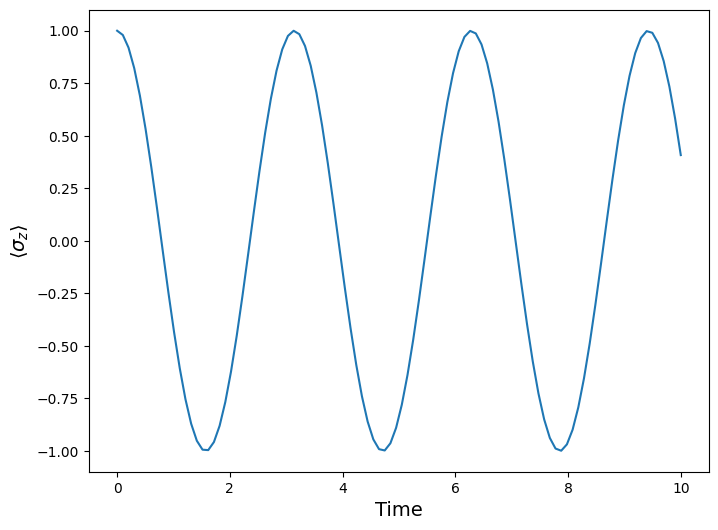

In [63]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(tlist, expect(sigmaz(), result.states))

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=14)

If we are only interested in expectation values, we could pass a list of operators to the `mesolve` function that we want expectation values for, and have the solver compute them and store the results in the `Odedata` class instance.

For example, to request that the solver calculates the expectation values for the operators $\sigma_z, \sigma_x, \sigma_y$

In [64]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

In [65]:
result.expect[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
result.expect[1]

array([ 0.        , -0.2006488 , -0.39313648, -0.56963387, -0.72296223,
       -0.84688518, -0.93636238, -0.98775449, -0.99897125, -0.96955644,
       -0.90070646, -0.79522165, -0.65739242, -0.49282475, -0.30821213,
       -0.11106341,  0.0906027 ,  0.28858368,  0.4748269 ,  0.64175721,
        0.782585  ,  0.89158231,  0.9643159 ,  0.99782745,  0.99075396,
        0.94338312,  0.85764166,  0.73701694,  0.58641519,  0.41196187,
        0.22075258,  0.02056446, -0.18046012, -0.37414472, -0.55261151,
       -0.70860162, -0.83577041, -0.92894553, -0.98433722, -0.99969255,
       -0.97438698, -0.90944976, -0.80752209, -0.67274971, -0.51061425,
       -0.32771028, -0.13147716,  0.07010365,  0.26883311,  0.45662814,
        0.62585046,  0.76961723,  0.88208098,  0.95866746,  0.99626163,
        0.99333444,  0.95000495,  0.86803551,  0.75076006,  0.60294861,
        0.4306131 ,  0.24076303,  0.04112023, -0.16019512, -0.35499473,
       -0.53535543, -0.69394131, -0.82430216, -0.92113578, -0.98

In [67]:
result.expect[2]

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

Text(0, 0.5, 'Expectation values')

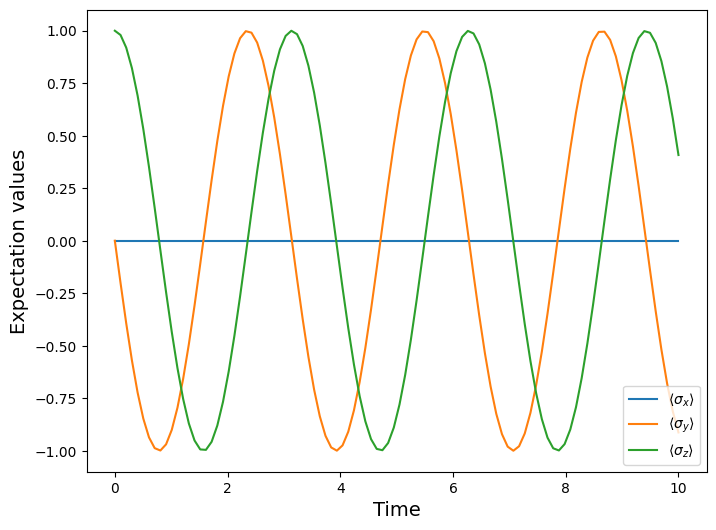

In [68]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(tlist, result.expect[0], label=r'$\left<\sigma_x\right>$')
ax.plot(tlist, result.expect[1], label=r'$\left<\sigma_y\right>$')
ax.plot(tlist, result.expect[2], label=r'$\left<\sigma_z\right>$')

ax.legend()
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Expectation values', fontsize=14)



## Dissipative Dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the  `mesolve` solver.
A collapse operator is an operator that describes how the system is interacting with its environment.

For example, consider a quantum harmonic osciallator with Hamiltonian

$$ H = \hbar \omega a^{\dagger} a $$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is $\sqrt{\kappa a} $

Since $a$ is the photon anhilation operator of the oscillator. 

In [69]:
w = 1.0 # frequency of the harmonic oscillator
kappa = 0.1 # coupling to the environment
a = destroy(10) # annihilation operator
rho0 = fock_dm(10, 5) # initial state
H = w * a.dag() * a # Hamiltonian

c_ops = [np.sqrt(kappa) * a] # collapse operators

In [70]:
tlist = np.linspace(0, 50, 100)

""" Request that the solver return the expectation value of the photon number operator a.dag() * a at all times."""

result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a])

' Request that the solver return the expectation value of the photon number operator a.dag() * a at all times.'

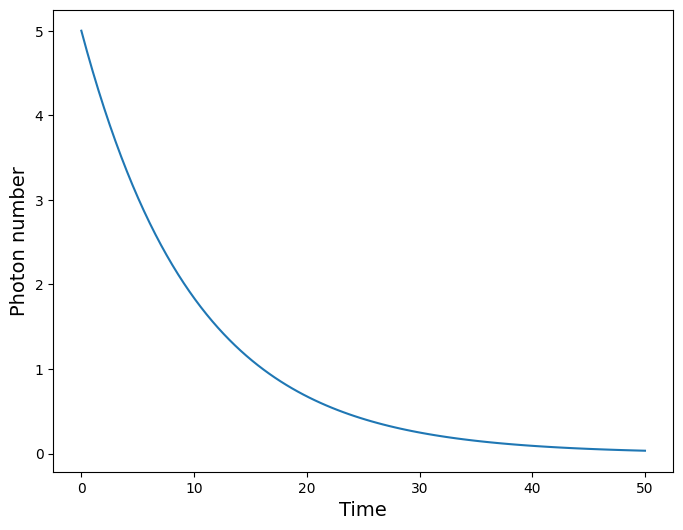

In [71]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(tlist, result.expect[0])

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Photon number', fontsize=14)

""" Request that the solver return the expectation value of the photon number operator a.dag() * a at all times."""



#### Software Versions

In [72]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.5
Numpy Version:      1.26.4
Scipy Version:      1.12.0
Cython Version:     None
Matplotlib Version: 3.8.3
Python Version:     3.10.11
Number of CPUs:     24
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  c:\Users\monitsharma\Downloads\code\qutip-and-quantum-control\.venv\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibt